In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/5Animal'

Mounted at /content/drive


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255.0,
    zoom_range=0.2,
    rotation_range = 20,
    horizontal_flip=True,
    validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    class_mode='categorical',
    shuffle = True,
    subset='validation')

Found 1120 images belonging to 5 classes.
Found 194 images belonging to 5 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])

In [6]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
early_stop = EarlyStopping(
    monitor='accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [8]:
epochs = 35

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[early_stop],
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
35/35 ━━━━━━━━━━━━━━━━━━━━ 937s 27s/step - accuracy: 0.2148 - loss: 1.6986 - val_accuracy: 0.3557 - val_loss: 1.4842
Epoch 2/35
35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 980ms/step - accuracy: 0.3626 - loss: 1.4518 - val_accuracy: 0.4691 - val_loss: 1.3000
Epoch 3/35
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 980ms/step - accuracy: 0.4027 - loss: 1.3116 - val_accuracy: 0.4433 - val_loss: 1.2361
Epoch 4/35
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 999ms/step - accuracy: 0.4898 - loss: 1.2302 - val_accuracy: 0.5052 - val_loss: 1.1478
Epoch 5/35
35/35 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.5180 - loss: 1.1375 - val_accuracy: 0.4948 - val_loss: 1.1565
Epoch 6/35
35/35 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5889 - loss: 1.0562 - val_accuracy: 0.5773 - val_loss: 1.0461
Epoch 7/35
35/35 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6070 - loss: 0.9788 - val_accuracy: 0.5670 - val_loss: 1.0726
Epoch 8/35
35/35 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6229 - loss: 0.9740 - val_accuracy: 0.5670 

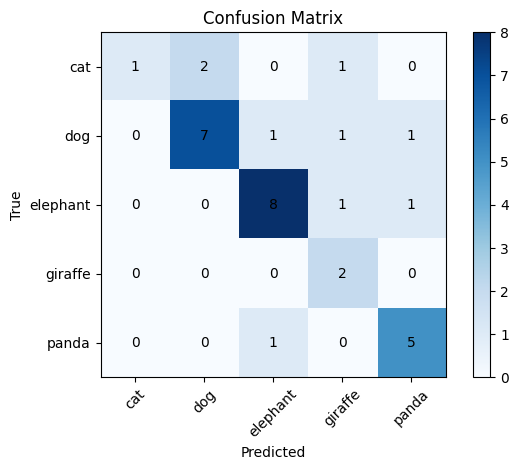

In [24]:
Y_true = []
Y_pred = []
label_animal = ['cat', 'dog', 'elephant', 'giraffe', 'panda']

images, labels = validation_generator[0]

for img, lbl in zip(images, labels):
    pred = model.predict(np.expand_dims(img, 0), verbose=0)
    Y_pred.append(np.argmax(pred))
    Y_true.append(np.argmax(lbl))

cm = np.zeros((5, 5), dtype=int)
for t, p in zip(Y_true, Y_pred):
    cm[t, p] += 1

plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.xticks(np.arange(5), label_animal, rotation=45)
plt.yticks(np.arange(5), label_animal)

for i in range(5):
    for j in range(5):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.tight_layout()
plt.show()

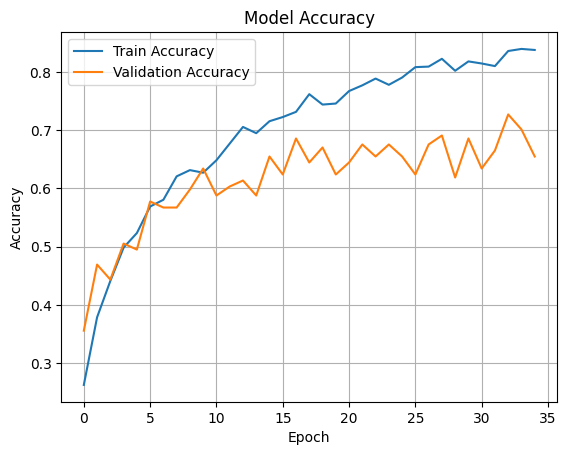

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

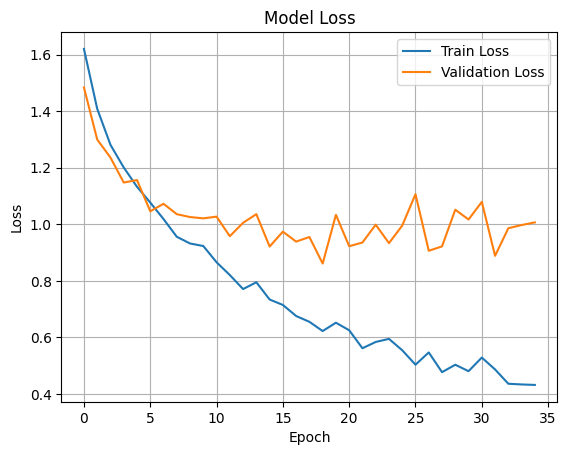

In [19]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


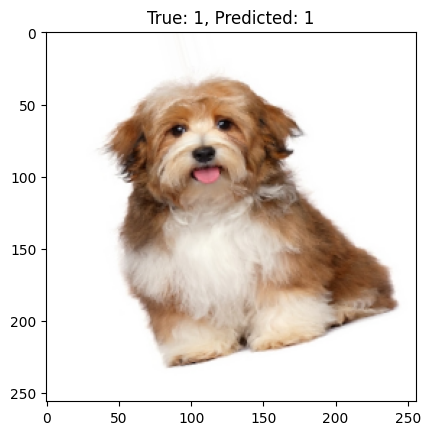

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x_val, y_val = next(validation_generator)

index = np.random.randint(0, len(x_val))
image = x_val[index]
true_label = np.argmax(y_val[index])

prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(image)
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.show()